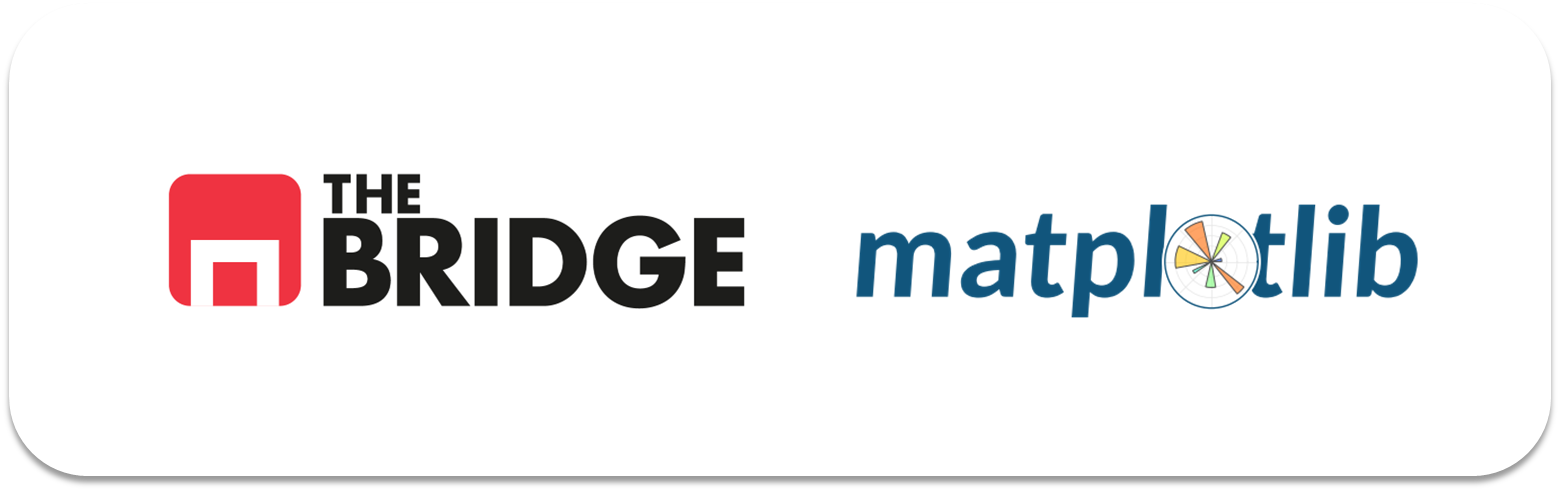

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [2]:
df = pd.read_csv("./data/california_cities.csv")
df.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [4]:
df.dropna(inplace=True) #Eliminamos las filas que contienen al menos un elemento nulo
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          427 non-null    int64  
 1   city                427 non-null    object 
 2   latd                427 non-null    float64
 3   longd               427 non-null    float64
 4   elevation_m         427 non-null    float64
 5   elevation_ft        427 non-null    float64
 6   population_total    427 non-null    int64  
 7   area_total_sq_mi    427 non-null    float64
 8   area_land_sq_mi     427 non-null    float64
 9   area_water_sq_mi    427 non-null    float64
 10  area_total_km2      427 non-null    float64
 11  area_land_km2       427 non-null    float64
 12  area_water_km2      427 non-null    float64
 13  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 50.0+ KB


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

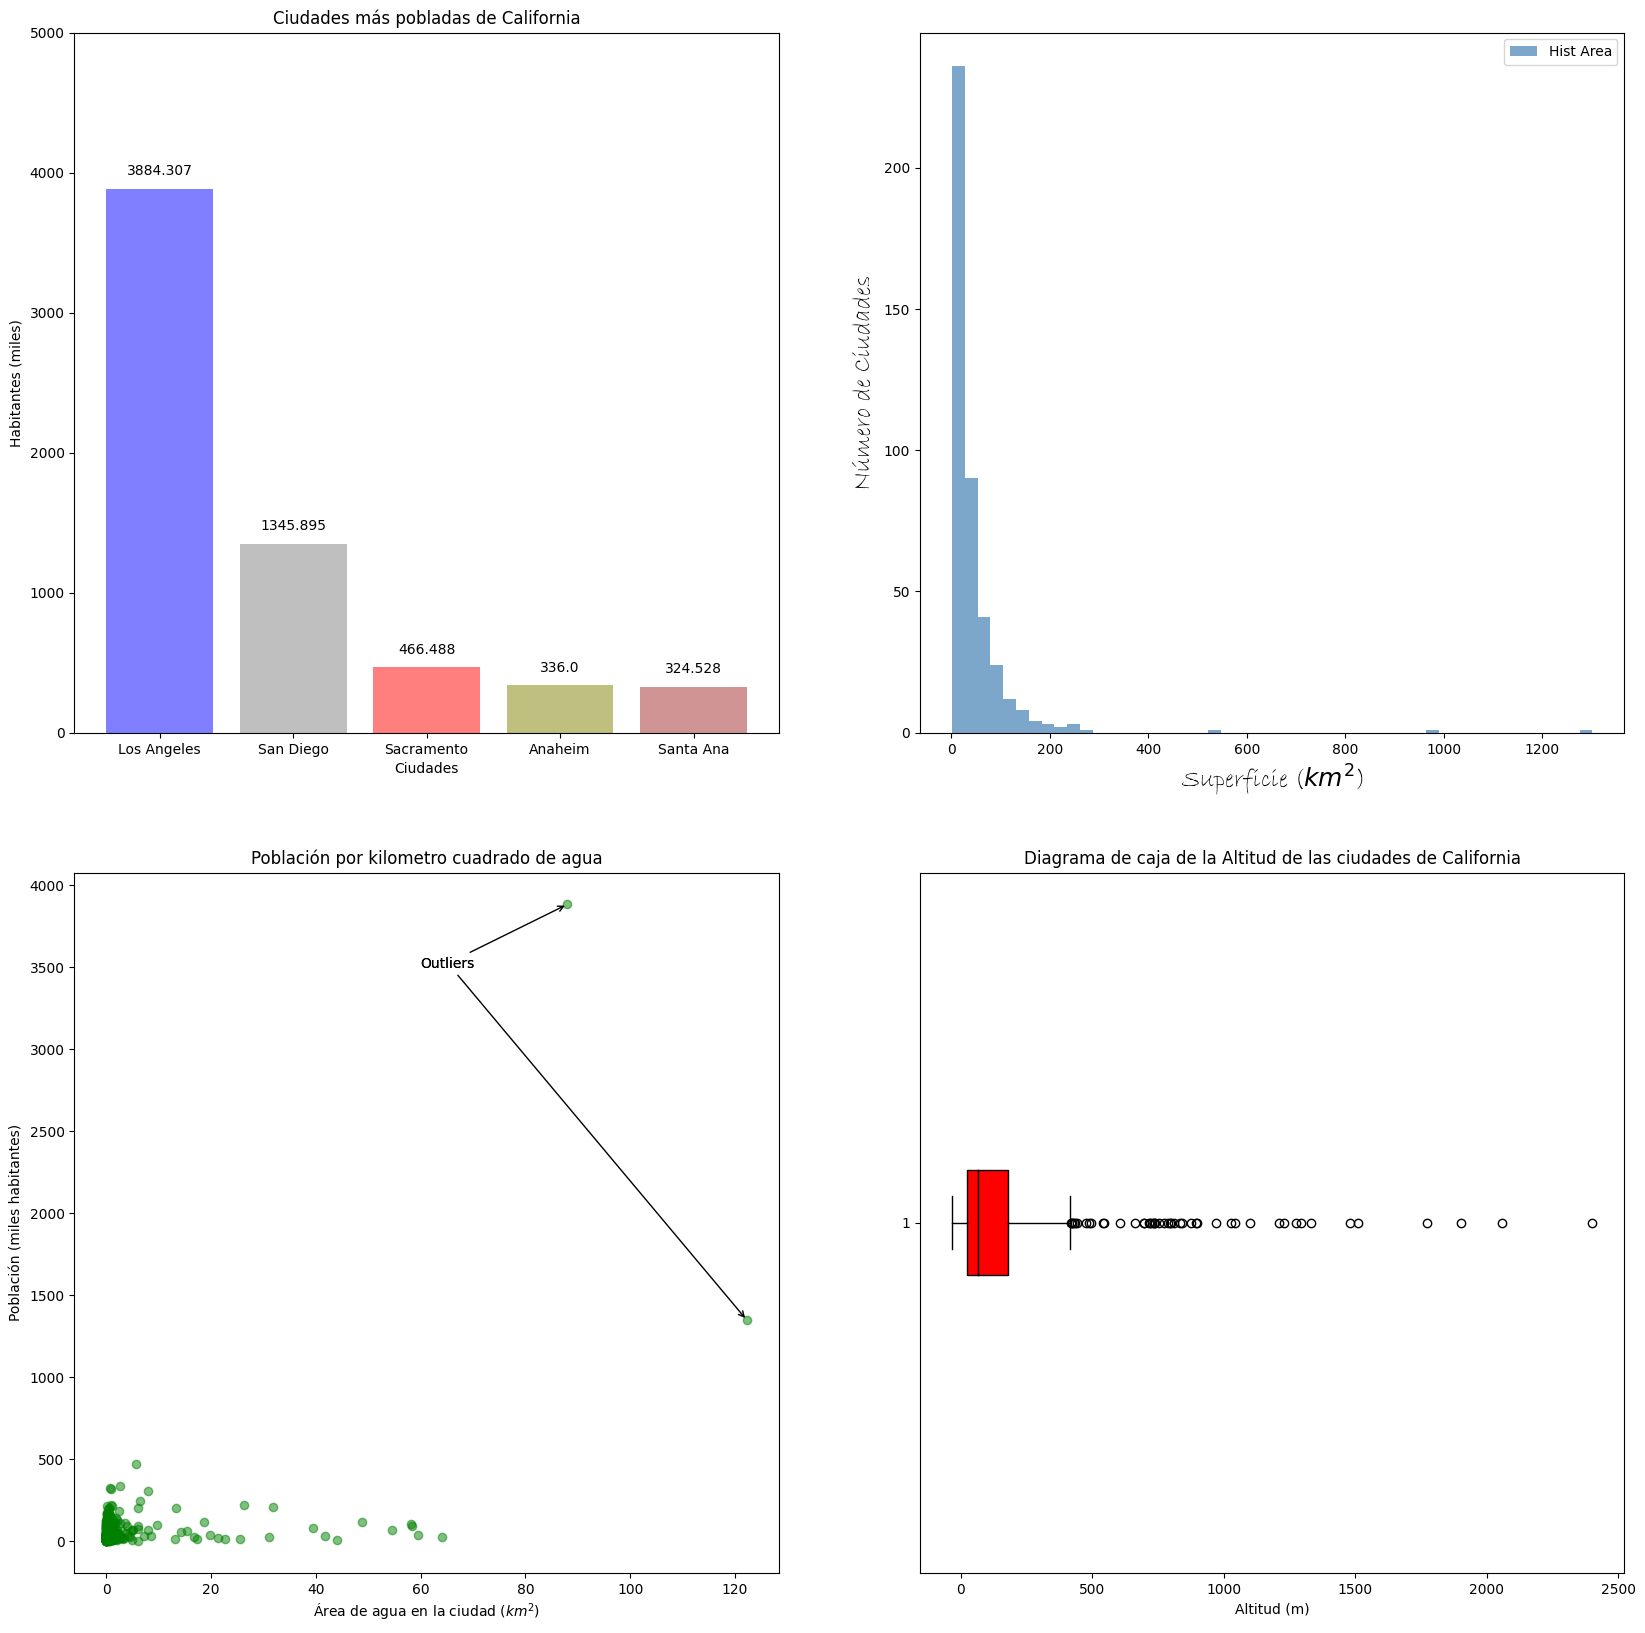

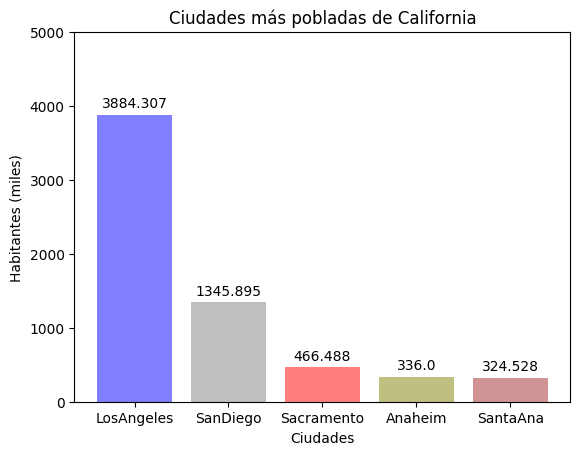

In [5]:
#Primer gráfico

#Creamos las listas que usaremos en la creacion del grafico de barras
ciudades = df.loc[df["population_total"].nlargest(5).index, "city"].to_list() #Ciudades
habitantes = (df["population_total"].nlargest(5)/1000).to_list() #Habitantes en miles
colores = ["blue", "grey", "red", "olive", "brown"]

#Creamos el gráfico de barras
plt.bar(x=ciudades, height=habitantes, color = colores, alpha=0.5)

#Creamos el titulo
plt.title("Ciudades más pobladas de California")

#Creamos las etiquetas de los ejes
plt.xlabel("Ciudades")
plt.ylabel("Habitantes (miles)")

#Definimos los límites del eje y
plt.ylim(0,5000)

#Creamos los valores encima de las barras
for indice, ciudad in enumerate(ciudades):
    n_habitantes = habitantes[indice]
    plt.text(x=ciudad, y=n_habitantes+100, s=f"{n_habitantes}", ha="center")

plt.show()

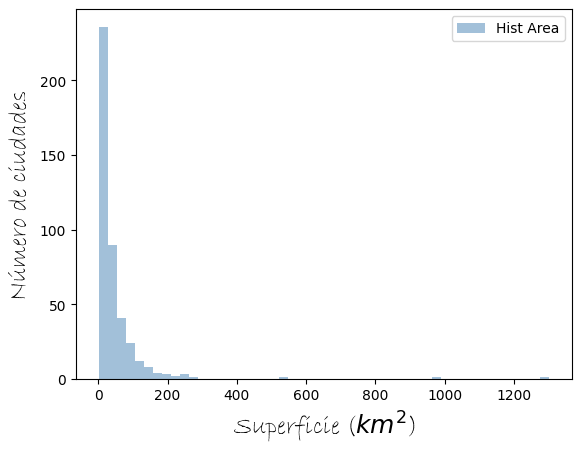

In [6]:
#Segundo gráfico

#Creamos el gráfico de barras
plt.hist(x=df["area_total_km2"], bins=50, color="steelblue", label="Hist Area", alpha=0.5)

#Creamos las etiquetas de los ejes
plt.xlabel("Superficie ($km^{2}$)", fontdict={"family":"Bradley Hand itc", "size":18})
plt.ylabel("Número de ciudades", fontdict={"family":"Bradley Hand itc", "size":18})

#Mostramos la leyenda
plt.legend()

plt.show()

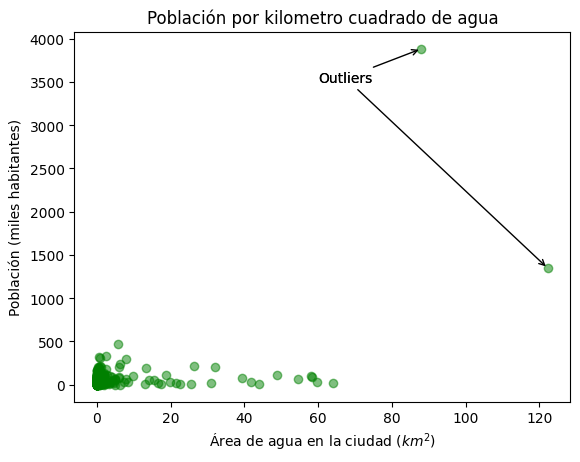

In [7]:
#Tercer gráfico

#Creamos las listas que usaremos en la creacion del grafico de dispersion
area_agua = df["area_water_km2"].to_list() #Area de agua en la ciudad
habitantes = (df["population_total"]/1000).to_list() #Habitantes en miles

#Creamos el diagrama de dispersion
plt.scatter(x=area_agua, y=habitantes, color="green", alpha=0.5)

#Creamos la anotacion
plt.annotate(text = "Outliers", xy =(df.loc[(df["population_total"]/1000).idxmax(),"area_water_km2"], (df["population_total"]/1000).max()), xytext=(60, 3500), arrowprops={"arrowstyle":"->"})

#Creamos la anotacion
plt.annotate(text = "Outliers", xy =(df["area_water_km2"].max(), (df.loc[df["area_water_km2"].idxmax(),"population_total"]/1000)), xytext=(60, 3500), arrowprops={"arrowstyle":"->"})

#Creamos el titulo
plt.title("Población por kilometro cuadrado de agua")

#Creamos las etiquetas de los ejes
plt.xlabel("Área de agua en la ciudad ($km^{2}$)")
plt.ylabel("Población (miles habitantes)")

plt.show()

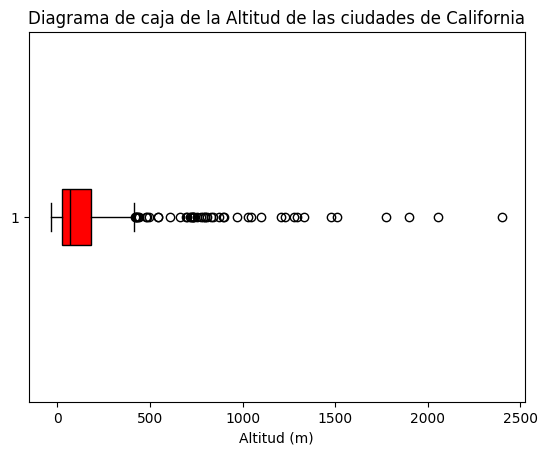

In [8]:
#Cuarto grafico

#Creamos las listas que usaremos en la creacion del grafico de dispersion
area_agua = df["area_water_km2"].to_list() #Area de agua en la ciudad
habitantes = (df["population_total"]/1000).to_list() #Habitantes en miles

#Creamos el diagrama de caja
plt.boxplot(df["elevation_m"], patch_artist=True, boxprops={"facecolor":"red", "color":"black"}, medianprops={'color': 'black'}, vert=False)

#Creamos el titulo
plt.title("Diagrama de caja de la Altitud de las ciudades de California")

#Creamos la etiqueta del eje horizontal
plt.xlabel("Altitud (m)")

plt.show()


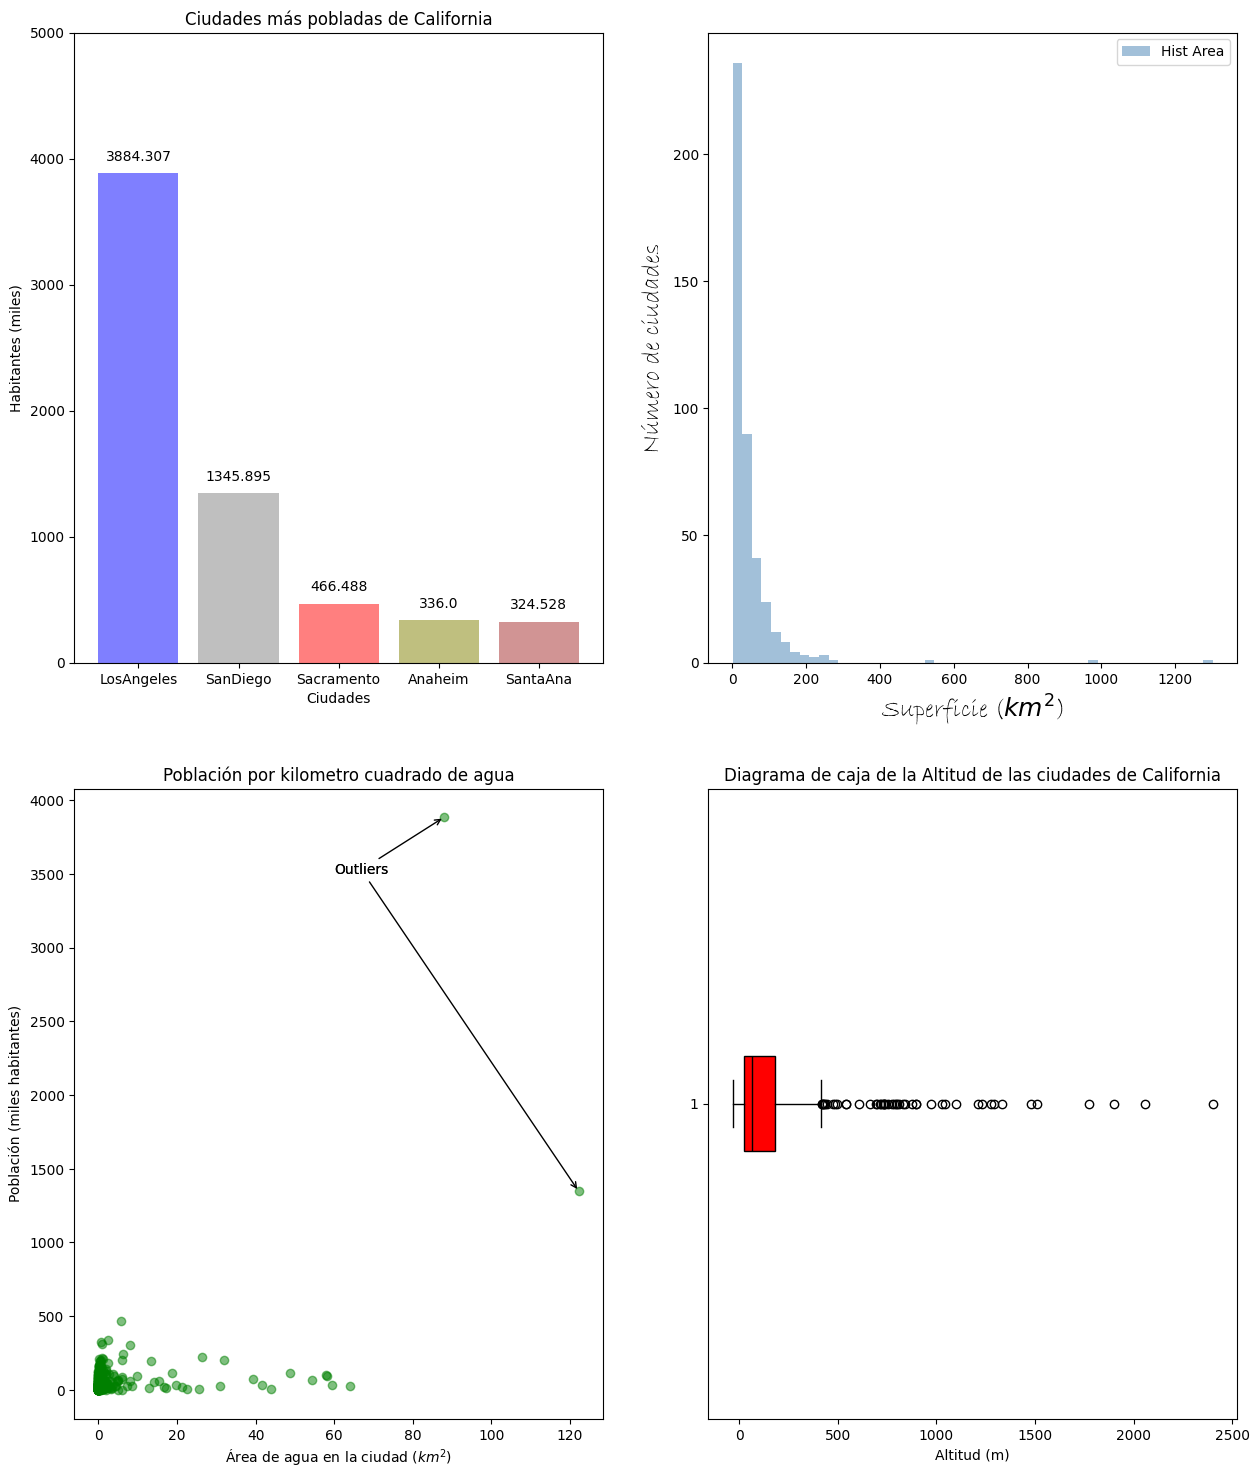

In [9]:
#Una sola figura con los cuatro graficos
fig, ax = plt.subplots(2,2, figsize = (15,18)) #2 filas, 2 columnas

#Primer grafico

#Creamos las listas que usaremos en la creacion del grafico de barras
ciudades = df.loc[df["population_total"].nlargest(5).index, "city"].to_list() #Ciudades
habitantes = (df["population_total"].nlargest(5)/1000).to_list() #Habitantes en miles
colores = ["blue", "grey", "red", "olive", "brown"]

#Creamos el gráfico de barras
ax[0,0].bar(x=ciudades, height=habitantes, color = colores, alpha=0.5)

#Creamos el titulo
ax[0,0].set_title("Ciudades más pobladas de California")

#Creamos las etiquetas de los ejes
ax[0,0].set_xlabel("Ciudades")
ax[0,0].set_ylabel("Habitantes (miles)")

#Definimos los límites del eje y
ax[0,0].set_ylim(0,5000)

#Creamos los valores encima de las barras
for indice, ciudad in enumerate(ciudades):
    n_habitantes = habitantes[indice]
    ax[0,0].text(x=ciudad, y=n_habitantes+100, s=f"{n_habitantes}", ha="center")

#Segundo gráfico

#Creamos el gráfico de barras
ax[0,1].hist(x=df["area_total_km2"], bins=50, color="steelblue", label="Hist Area", alpha=0.5)

#Creamos las etiquetas de los ejes
ax[0,1].set_xlabel("Superficie ($km^{2}$)", fontdict={"family":"Bradley Hand itc", "size":18})
ax[0,1].set_ylabel("Número de ciudades", fontdict={"family":"Bradley Hand itc", "size":18})

#Mostramos la leyenda
ax[0,1].legend()

#Tercer gráfico

#Creamos las listas que usaremos en la creacion del grafico de dispersion
area_agua = df["area_water_km2"].to_list() #Area de agua en la ciudad
habitantes = (df["population_total"]/1000).to_list() #Habitantes en miles

#Creamos el diagrama de dispersion
ax[1,0].scatter(x=area_agua, y=habitantes, color="green", alpha=0.5)

#Creamos la anotacion
ax[1,0].annotate(text = "Outliers", xy =(df.loc[(df["population_total"]/1000).idxmax(),"area_water_km2"], (df["population_total"]/1000).max()), xytext=(60, 3500), arrowprops={"arrowstyle":"->"})

#Creamos la anotacion
ax[1,0].annotate(text = "Outliers", xy =(df["area_water_km2"].max(), (df.loc[df["area_water_km2"].idxmax(),"population_total"]/1000)), xytext=(60, 3500), arrowprops={"arrowstyle":"->"})

#Creamos el titulo
ax[1,0].set_title("Población por kilometro cuadrado de agua")

#Creamos las etiquetas de los ejes
ax[1,0].set_xlabel("Área de agua en la ciudad ($km^{2}$)")
ax[1,0].set_ylabel("Población (miles habitantes)")

#Cuarto grafico

#Creamos las listas que usaremos en la creacion del grafico de dispersion
area_agua = df["area_water_km2"].to_list() #Area de agua en la ciudad
habitantes = (df["population_total"]/1000).to_list() #Habitantes en miles

#Creamos el diagrama de caja
ax[1,1].boxplot(df["elevation_m"], patch_artist=True, boxprops={"facecolor":"red", "color":"black"}, medianprops={'color': 'black'}, vert=False)

#Creamos el titulo
ax[1,1].set_title("Diagrama de caja de la Altitud de las ciudades de California")

#Creamos la etiqueta del eje horizontal
ax[1,1].set_xlabel("Altitud (m)")


plt.tight_layout
plt.show()


### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [10]:
#Guardamos la figura en el mismo directorio del notebook
fig.savefig('Practica_obligatoria_1.png')